In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv('economic_index.csv')

In [41]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [42]:
df.drop(columns=['year','month',"Unnamed: 0"],inplace=True)

In [43]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [44]:
df.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [46]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


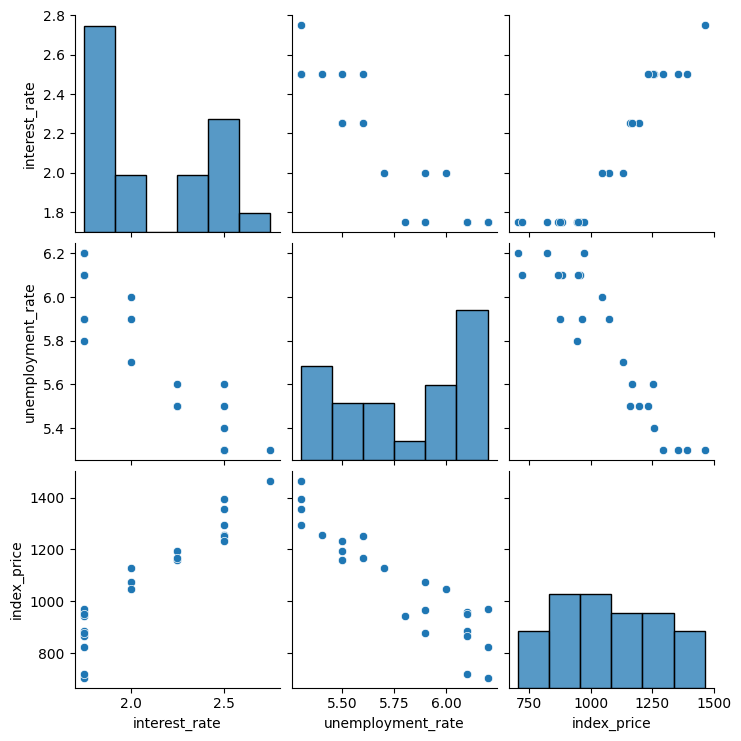

In [47]:
sns.pairplot(df)

In [48]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


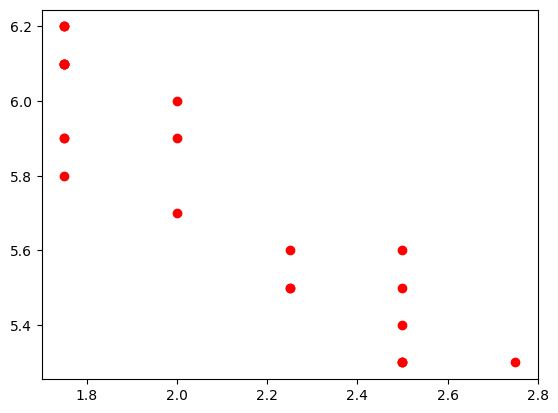

In [49]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color="r")

In [50]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [51]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [52]:
from sklearn.model_selection import train_test_split 


In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [82]:
df['interest_rate']

0     2.75
1     2.50
2     2.50
3     2.50
4     2.50
5     2.50
6     2.50
7     2.25
8     2.25
9     2.25
10    2.00
11    2.00
12    2.00
13    1.75
14    1.75
15    1.75
16    1.75
17    1.75
18    1.75
19    1.75
20    1.75
21    1.75
22    1.75
23    1.75
Name: interest_rate, dtype: float64

In [83]:
sns.regplot(df['interest_rate'],df['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [84]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

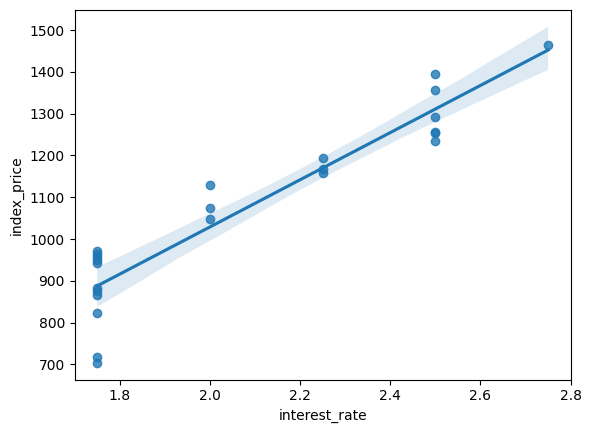

In [85]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

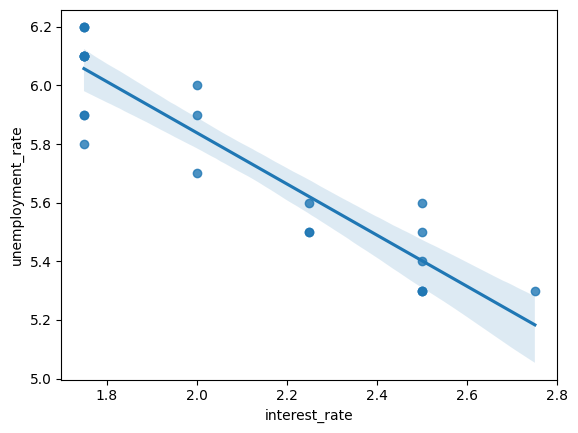

In [86]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [88]:
X_train_stand=scaler.fit_transform(X_train);
X_test_stand=scaler.fit_transform(X_test);

In [89]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [90]:
regression.fit(X_train_stand,Y_train);

In [98]:
regression.coef_# two values as two independent features

array([  88.27275507, -116.25716066])

In [99]:

## prediction
y_pred=regression.predict(X_test_stand)

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [101]:
mse=mean_squared_error(y_pred,Y_test)
mae=mean_absolute_error(y_pred,Y_test)
rmse=np.sqrt(mse);
print(mse,mae,rmse)

8108.567426306607 73.80444932337097 90.04758423359623


In [102]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


## Assumptions